# Activity 1

p_fit =  0.58


/tmp/ipykernel_7163/2113324237.py:12: RuntimeWarning: divide by zero encountered in log
  return n * np.log(p) + (N - n) * np.log(1 - p)


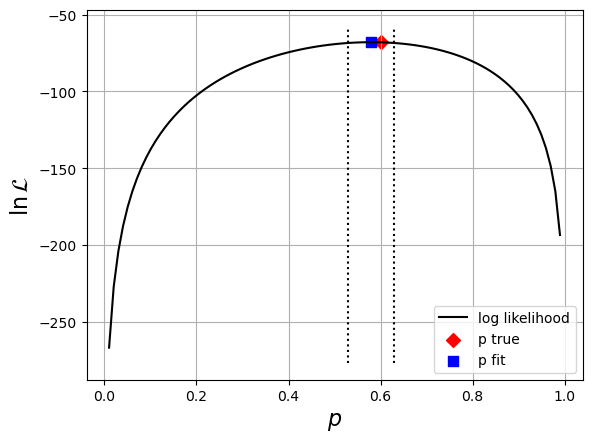

In [25]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import fsolve

def pmf(x, p): 
    return (p ** x) * (1 - p) ** (1 - x)

def gen_tosses(p, N):
    return np.random.choice([1, 0], size=N, p=[p, 1-p])

def log_lik(p, N, n): 
    return n * np.log(p) + (N - n) * np.log(1 - p)

def est_prob(count, N):
    return count / N

#simulation
true_p = 0.6
N = 100
tosses = gen_tosses(true_p, N)
count = np.sum(tosses)
likelihood = log_lik(true_p, N, count)
estimated_p = est_prob(count, N)
print('p_fit = ', estimated_p) 

#plotting
p_vals = np.linspace(0, 1, 100)
log_lik_vals = log_lik(p_vals, N, count)

plt.plot(p_vals, log_lik_vals, 'k-')
plt.scatter(true_p, likelihood, marker='D', c="r", s=50)
plt.scatter(estimated_p, likelihood, marker='s', c="blue", s=55)
plt.legend(['log likelihood', 'p true', 'p fit'])
plt.ylabel(r'$\ln{\mathcal{L}}$', fontsize=16)
plt.xlabel(r'$p$', fontsize=16)


#calculating uncertainty in estimated_p
max_likelihood = log_lik(estimated_p, N, count)
error_func = lambda p: log_lik(p, N, count) - max_likelihood + 0.5
error_bounds = fsolve(error_func, [estimated_p - 0.2, estimated_p + 0.2])

#plotting uncertainty in estimated_p
plt.vlines(error_bounds, ymin=plt.ylim()[0], ymax=plt.ylim()[1], colors='k', ls=':')
plt.grid()
plt.show()


# Activity 2

[ 3.01745492e+02  7.22382717e-03  5.54208713e+01  1.65695696e-03
  2.17160333e+01 -1.04635654e-02]


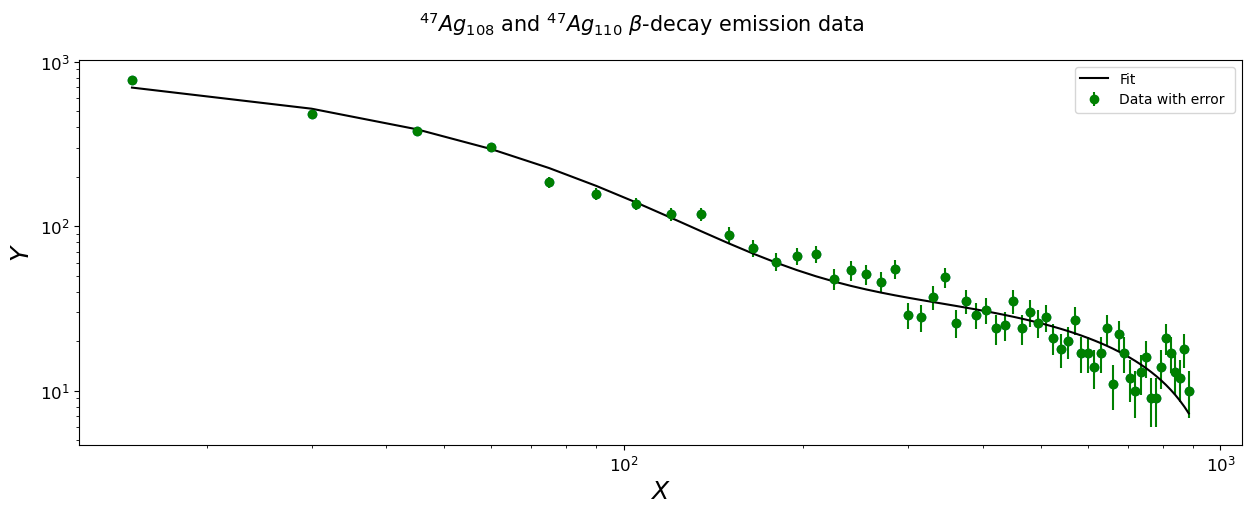

Functional form is:
y = -5.72e+03 * exp(-0.0214*x) + 6.62e+03 * exp(-0.0214*x) + -0.0478*x + 49.6
Chi square  =  
102.81260409436993 4.928640455192923e-05


In [7]:
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

def lin(x, a, b):
    return a + b * x

def log(x, a, b):
    return a - b * x 

def func(x, a, b, c, d, e, f):
    return a * np.exp(-b * x) + c * np.exp(-d * x) + e * x + f

def fit_and_plot(func, start, stop, p=None, log=True):
    data_subset = my_data.T[:, start:stop]
    if log:
        params, _ = curve_fit(func, data_subset[0], np.log(data_subset[1]), sigma=data_subset[2], p0=p, absolute_sigma=True, maxfev=15000)
    else:
        params, _ = curve_fit(func, data_subset[0], data_subset[1], sigma=data_subset[2], p0=p, absolute_sigma=True, maxfev=15000)

    fit_x = np.linspace(data_subset[0, 0], data_subset[0, -1], 1000)
    fit_y = func(fit_x, *params)
    return fit_x, fit_y, params

my_data = np.genfromtxt('Activity3.csv', delimiter=',')
fig, ax = plt.subplots(1, 1, figsize=(15, 5))

data_size = len(my_data) // 3
_, _, p1 = fit_and_plot(log, 0, data_size)
_, _, p2 = fit_and_plot(log, data_size, 2 * data_size)
_, _, p3 = fit_and_plot(lin, 2 * data_size, len(my_data.T[0]) - 1, log=False)

params_guess = np.array([np.exp(p1[0]), p1[1], np.exp(p2[0]), p2[1], p3[0], p3[1]])
print(params_guess)
params, _ = curve_fit(func, my_data.T[0], my_data.T[1], sigma=my_data.T[2], p0=params_guess, absolute_sigma=True, maxfev=15000)

fit_x = np.linspace(my_data.T[0, 0], my_data.T[0, -1], 59)
fit_y = func(fit_x, *params)

ax.scatter(my_data.T[0], my_data.T[1])
ax.errorbar(my_data.T[0], my_data.T[1], yerr=my_data.T[2], fmt="o", color='g', label="Data with error ")
ax.plot(fit_x, fit_y, color='k', label="Fit")
ax.legend()

ax.set_yscale("log")
ax.set_xscale("log")
ax.set_xlabel(r'$X$', fontsize=18)
ax.set_ylabel(r'$Y$', fontsize=18)
ax.tick_params(axis='both', labelsize=12)

plt.suptitle(r"$^{47}Ag_{108}$ and $^{47}Ag_{110}$ $\beta$-decay emission data", fontsize=15)
plt.savefig("beta_data.png")
plt.show()

print("Functional form is:")
print(f"y = {params[0]:.3} * exp(-{params[1]:.3}*x) + {params[2]:.3} * exp(-{params[3]:.3}*x) + {params[4]:.3}*x + {params[5]:.3}")

print("Chi square  =  ")
chisq = np.sum(((my_data.T[1][:59] - fit_y)**2) / my_data.T[2][:59]**2)
dof = len(my_data) - 6
print(chisq, 1 - stats.chi2.cdf(chisq, dof))


# Activity 3

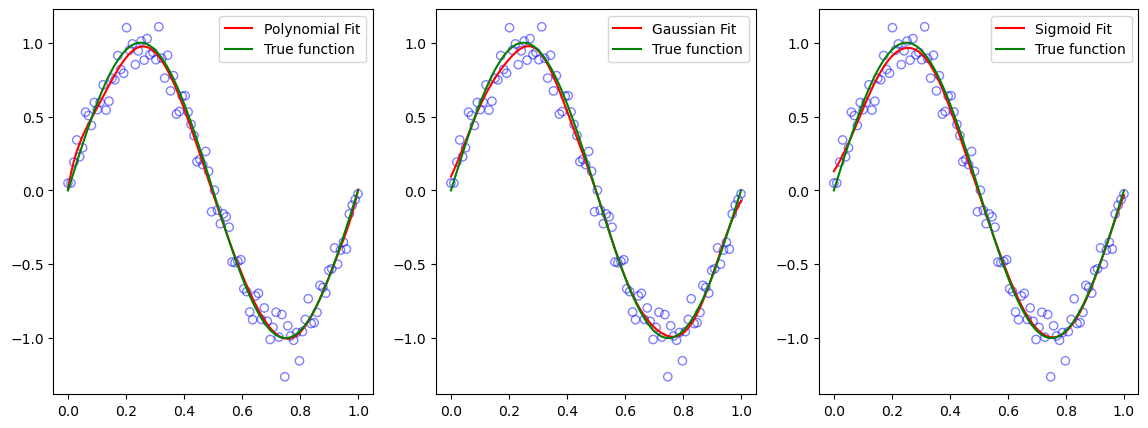

In [24]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
from numpy.linalg import inv

# Seed for reproducibility
np.random.seed(42)

# Generate data
x = np.linspace(0, 1, 100)  # 100 data points
y_true = np.sin(2 * np.pi * x)
noise = np.random.normal(0, 0.1, x.shape)
y = y_true + noise

# Polynomial fitting
coefficients_poly = np.polyfit(x, y, 11)
poly_fit = np.poly1d(coefficients_poly)

# Gaussian basis function
def gaussian_basis(x, mu, s=0.1):
    return np.exp(-(x - mu)**2 / (2 * s**2))

# Sigmoid basis function
def sigmoid_basis(x, mu, s=1.0):
    return 1 / (1 + np.exp(-(x - mu) / s))

# Prepare the design matrix for Gaussian and Sigmoid
s = 0.1  # Scale parameter
mus = np.linspace(0, 1, 11)  # Centers
X_gauss = np.array([gaussian_basis(x, mu, s) for mu in mus]).T
X_sig = np.array([sigmoid_basis(x, mu, s) for mu in mus]).T

# Least squares fitting for Gaussian and Sigmoid
coefficients_gauss, _, _, _ = np.linalg.lstsq(X_gauss, y, rcond=None)
coefficients_sig, _, _, _ = np.linalg.lstsq(X_sig, y, rcond=None)

# Predictions
y_gauss = X_gauss.dot(coefficients_gauss)
y_sig = X_sig.dot(coefficients_sig)

# Plot results
plt.figure(figsize=(14, 5))
plt.subplot(1, 3, 1)
plt.scatter(x, y, edgecolor='b', facecolor='none', alpha=0.5)
plt.plot(x, poly_fit(x), color='r', label='Polynomial Fit')
plt.plot(x, y_true, color='g', label='True function')
plt.legend()

plt.subplot(1, 3, 2)
plt.scatter(x, y, edgecolor='b', facecolor='none', alpha=0.5)
plt.plot(x, y_gauss, color='r', label='Gaussian Fit')
plt.plot(x, y_true, color='g', label='True function')
plt.legend()

plt.subplot(1, 3, 3)
plt.scatter(x, y, edgecolor='b', facecolor='none', alpha=0.5)
plt.plot(x, y_sig, color='r', label='Sigmoid Fit')
plt.plot(x, y_true, color='g', label='True function')
plt.legend()

plt.show()


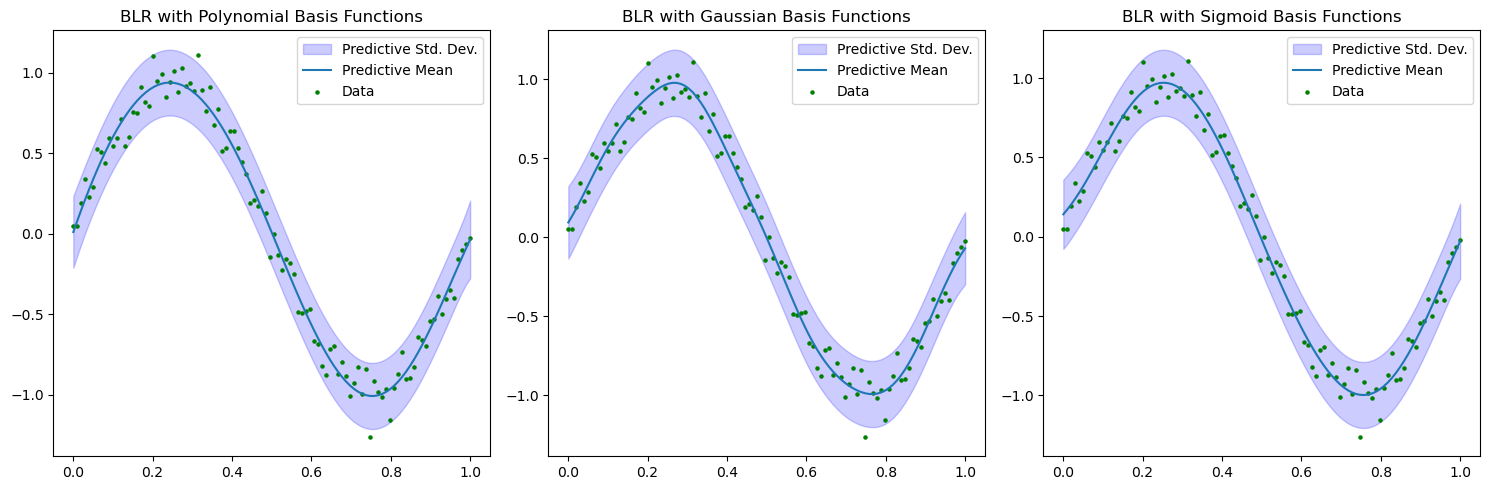

In [22]:
# Bayesian inference for all three models

import numpy as np
import matplotlib.pyplot as plt

# Assuming prior
alpha = 0.005  # prior's precision (for the weights)
beta = 1 / (0.1 ** 2)  # noise precision (from data generation step)

# Function for Bayesian inference
def bayesian_inference(X, y, alpha, beta):
    S_N_inv = alpha * np.eye(X.shape[1]) + beta * X.T @ X
    S_N = np.linalg.inv(S_N_inv)
    m_N = beta * S_N @ X.T @ y
    return m_N, S_N

# Function to make predictions using the posterior distribution
def predict_with_blr(X_new, m_N, S_N, beta):
    y_mean = X_new @ m_N
    y_var = 1 / beta + np.sum(X_new @ S_N * X_new, axis=1)
    return y_mean, y_var

# Generate new data points for prediction
x_new = np.linspace(0, 1, 100)

# Define basis functions and models
basis_functions = [np.vander, lambda x, mu, s: np.array([gaussian_basis(x, mu, s) for mu in mus]).T, lambda x, mu, s: np.array([sigmoid_basis(x, mu, s) for mu in mus]).T]
model_names = ["Polynomial", "Gaussian", "Sigmoid"]

# Plotting subplots
fig, axes = plt.subplots(1, 3, figsize=(15, 5))

for i, (basis_func, model_name) in enumerate(zip(basis_functions, model_names)):
    # Prepare the design matrix
    X_basis = basis_func(x, N=12) if i == 0 else basis_func(x, mu=mus, s=s)

    # Compute posterior
    m_N, S_N = bayesian_inference(X_basis, y, alpha, beta)

    # New data for prediction
    X_new_basis = basis_func(x_new, N=12) if i == 0 else basis_func(x_new, mu=mus, s=s)

    # Predictions
    y_mean, y_var = predict_with_blr(X_new_basis, m_N, S_N, beta)
    y_std = np.sqrt(y_var)

    # Plotting
    axes[i].fill_between(x_new, y_mean - 2 * y_std, y_mean + 2 * y_std, color='b', alpha=0.2, label='Predictive Std. Dev.')
    axes[i].plot(x_new, y_mean, label='Predictive Mean')
    axes[i].scatter(x, y, color='g', s=5, label='Data')
    axes[i].legend()
    axes[i].set_title(f"BLR with {model_name} Basis Functions")

plt.tight_layout()
plt.show()
